In [2]:
import pandas as pd

admission_data = pd.read_csv('./datasets/datasets_14872_228180_Admission_Predict_Ver1.1.csv', error_bad_lines=False)

In [5]:
admission_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


GRE Scores ( out of 340 )  
TOEFL Scores ( out of 120 )  
University Rating ( out of 5 )  
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
Undergraduate GPA ( out of 10 )  
Research Experience ( either 0 or 1 )  
Chance of Admit ( ranging from 0 to 1 )  

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

X = admission_data.drop(['Chance of Admit '], axis=1)
y = admission_data['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,249.027500,316.727500,107.335000,3.112500,3.375000,3.480000,8.580750,0.555000
std,140.580382,10.969232,6.091432,1.145917,0.987072,0.921533,0.601328,0.497588
min,2.000000,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000
25%,132.500000,309.000000,103.000000,2.000000,2.500000,3.000000,8.137500,0.000000
50%,246.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.565000,1.000000
75%,368.250000,324.250000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 249 to 102
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 28.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x18ED2AA8>,
      dtype=object)

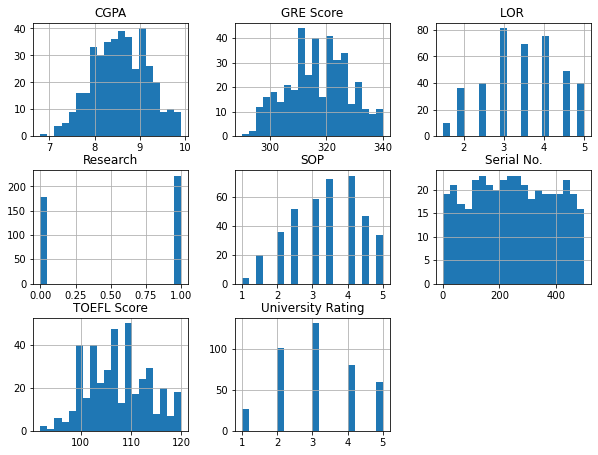

In [25]:
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(20/2, 15/2))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1A589D48>,
      dtype=object)

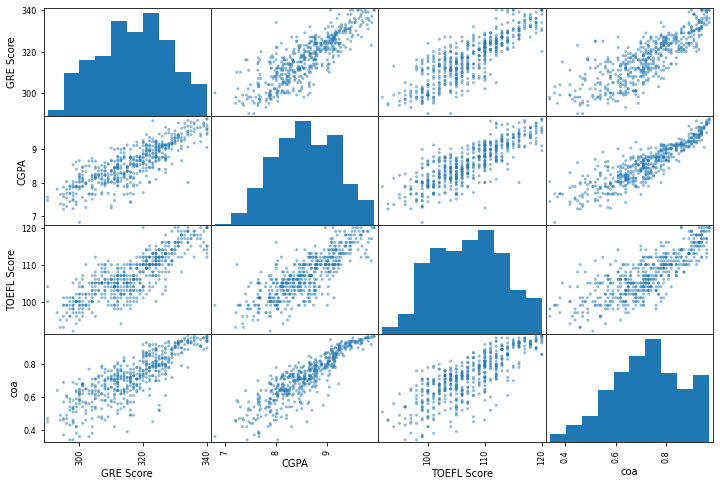

In [32]:
from pandas.plotting import scatter_matrix

fx = X
fx["coa"] = y
atrs = ["GRE Score", "CGPA", 'TOEFL Score', 'coa']
scatter_matrix(fx[atrs], figsize=(12, 8))

In [30]:
corr_matrix = fx.corr()
corr_matrix['coa'].sort_values(ascending=False)

coa                  1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial No.           0.008505
Name: coa, dtype: float64

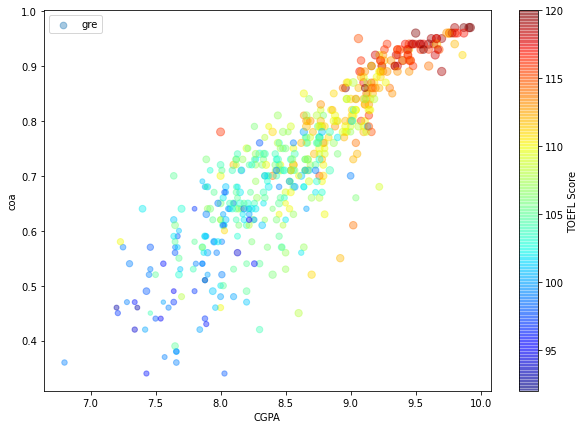

In [38]:
fx.plot(kind='scatter', x='CGPA', y='coa', alpha=0.4, s=np.subtract(fx['GRE Score'], 270), label='gre', figsize=(10, 7), c='TOEFL Score',
       cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

In [33]:
fx.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'coa'],
      dtype='object')

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

atr = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']

full_pipeline = ColumnTransformer([
    ("scaler", StandardScaler(), atr)
])

In [42]:
prepared_X = full_pipeline.fit_transform(X_train)

In [43]:
prepared_X

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_X, y_train)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error

train_predictions = lin_reg.predict(prepared_X)
lin_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
lin_rmse

0.05938480848210052

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, prepared_X, y_train, scoring='neg_mean_squared_error', cv=4)
rscores = np.sqrt(-scores)

In [50]:
rscores.mean()

0.06051764814754028

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=420)
scores = cross_val_score(forest_reg, prepared_X, y_train, scoring='neg_mean_squared_error', cv=4)
rscores = np.sqrt(-scores)
rscores.mean()

0.06729425650874268

In [54]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
scores = cross_val_score(svm_reg, prepared_X, y_train, scoring='neg_mean_squared_error', cv=4)
rscores = np.sqrt(-scores)
rscores.mean()


0.06752853630558944

In [55]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
scores = cross_val_score(sgd_reg, prepared_X, y_train, scoring='neg_mean_squared_error', cv=4)
rscores = np.sqrt(-scores)
rscores.mean()


0.061168930174210316

In [58]:
prepared_test = full_pipeline.fit_transform(X_test)
predicted_test = lin_reg.predict(prepared_test)
final_score = np.sqrt(mean_squared_error(y_test, predicted_test))


In [59]:
final_score

0.061333066977648565